# Load Packages and Extra Functions

In [1]:
using Printf, Dates, Statistics, DelimitedFiles, StatsBase

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [2]:
using Plots

gr(size=(1000,700))
default(fmt = :svg)

# Load Data

Returns from FX investments (for a US investor) in percent are in `Data_Returns.csv` and log forward premia in percent are in `Data_Forwardpremia.csv`.

In [3]:
x = readdlm("Data/Data_Returns.csv",',', skipstart=1)      #read data: daily returns in percent
x[:,1] = Date.(x[:,1])                                     #create julia date
R = x[:,2:end]                                             #create matrix R with returns, w/o dates

z = readdlm("Data/Data_Forwardpremia.csv",',',skipstart=2) #same procedure for the forward premia
z[:,1] = Date.(z[:,1])
fp = z[:,2:end]

x[:,1] == z[:,1]                                           #1) test if the dates are the same: true
x[:,1] === z[:,1]                                          #2) stricter option: false, as vectors are mutable, one vector could be muted
isequal(x[:,1], z[:,1])                                    #3) another option: true

true

# Forward Premia

Forward premia are plotted against time. Forward premia are multiplied by 12 so they can be interpreted as the (annualised) interest rate differential (foreign minus US).

In [4]:
annualised_fp = fp .* 12

300×9 Matrix{Float64}:
  1.72596   1.87176  -1.02228  -3.49656  …   1.54896  -2.14728   0.228
  1.76868   1.63572  -1.15404  -3.9822       2.0262   -2.62872   0.37884
  1.40556   1.96992  -1.48776  -4.85808      2.30748  -2.77068   0.22164
  1.57032   1.76376  -1.64556  -4.79352      2.58864  -2.93676   0.597
  1.46388   1.5762   -1.52928  -4.90368      2.64468  -2.78076   0.22692
  1.61772   1.04796  -1.64964  -5.17716  …   2.99832  -3.33948   0.60384
  1.86204   0.87588  -1.47396  -5.65632      3.42612  -3.55152   0.97668
  1.53312   0.44664  -1.55532  -5.10444      3.15204  -2.89164   0.8508
  1.72128   0.4464   -1.93416  -6.1338       3.00576  -3.438     0.83496
  1.82616   0.5376   -1.78992  -5.70552      3.10344  -4.0212    0.83496
  1.51572  -0.08832  -1.90956  -5.7324   …   2.97936  -3.68196   0.70584
  1.87344  -0.0      -2.01156  -5.41656      3.19644  -3.96528   0.84996
  1.69512  -0.08724  -1.938    -5.0034       2.92032  -3.67104   0.9522
  ⋮                               

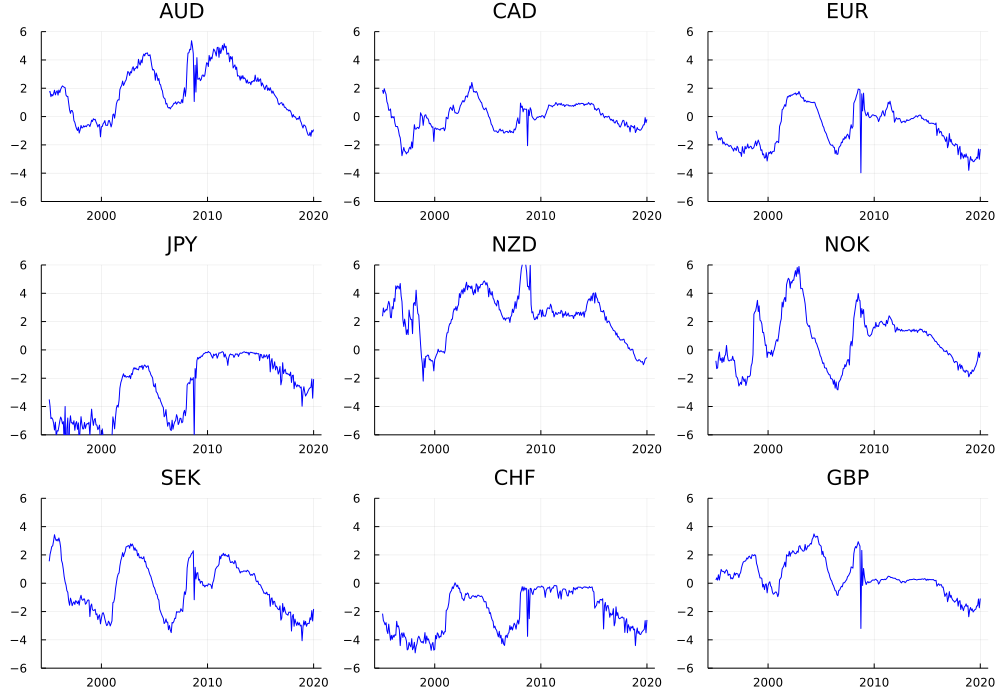

In [5]:
dN = z[:,1]                                                      #define values for x-axis
tick_years = Date.([2000, 2010, 2020])                           #define tick marks for x-axis
DateTick = Dates.format.(tick_years, "yyyy")                     #define tick marks for x-axis
x_vals = [dN dN dN dN dN dN dN dN dN]                            #data: dates
y_vals = annualised_fp                                           #data: annualized interest rate differential
titles = ["AUD" "CAD" "EUR" "JPY" "NZD" "NOK" "SEK" "CHF" "GBP"] #define chart titles

p1 = plot(x_vals, y_vals,
          layout = (3,3),
          linecolor = :blue,
          xticks = (tick_years, DateTick),
          ylims = (-6,6),
          title = titles,
          legend = false)

display(p1)

# Cumulated Log Returns

The cumulated log returns for a given currency are $r_1,r_1+r_2,r_1+r_2+r_3,...$ etc where $r_t$ is the log return in period $t$.

Log returns are computed as follows: $r= \ln(1+R/100)$ since the returns in `R` are in percent.

In [6]:
#Step 1: Create function to compute log returns
function log_return(R)
    r = log(1 + R/100)
    return r
end

#Step 2: Broadcast function on matrix R
log_returns = log_return.(R)

300×9 Matrix{Float64}:
 -0.0226003    -0.00455164   0.0134676   …   0.0148139    0.00813889
 -0.0253197     0.013265     0.0462204       0.0399561    0.00335138
 -0.00536155   -0.00364975   0.0588051       0.0880753    0.0254378
 -0.00569056    0.0307783   -0.0117529      -0.018236    -0.00965173
 -0.0117729    -0.00571178  -0.0205161      -0.0206139   -0.0132742
 -0.00999014   -0.00160298   0.0203256   …   0.0106251    0.00245568
  0.0419956     0.00378981  -0.00267528     -0.00191403   0.00539661
  0.01833       0.0201953   -0.0587517      -0.0491596   -0.0282675
  0.00595086   -7.44028e-5   0.0255103       0.041186     0.0194738
  0.00932281    0.00395069   0.0119238       0.0125105    0.000695758
 -0.0224052    -0.0136429   -0.0278293   …  -0.0372789   -0.0320835
  0.00193253   -0.00418916   0.00785517      0.0168723    0.0155042
  0.00156118   -0.00847158  -0.0389384      -0.0535857   -0.0257738
  ⋮                                      ⋱               
  0.0344265     0.0383769   

In [7]:
#Step 3: Create matrix with cumsum of log returns
cumsum_returns = cumsum(log_returns, dims=1)

300×9 Matrix{Float64}:
 -0.0226003   -0.00455164   0.0134676  …   0.0148139   0.00813889
 -0.0479199    0.00871339   0.059688       0.05477     0.0114903
 -0.0532815    0.00506363   0.118493       0.142845    0.0369281
 -0.058972     0.035842     0.10674        0.124609    0.0272763
 -0.070745     0.0301302    0.0862241      0.103995    0.0140021
 -0.0807351    0.0285272    0.10655    …   0.11462     0.0164578
 -0.0387395    0.032317     0.103874       0.112706    0.0218544
 -0.0204095    0.0525123    0.0451227      0.0635469  -0.00641307
 -0.0144587    0.0524379    0.0706331      0.104733    0.0130608
 -0.00513585   0.0563886    0.0825569      0.117243    0.0137565
 -0.0275411    0.0427457    0.0547276  …   0.0799645  -0.018327
 -0.0256086    0.0385565    0.0625828      0.0968367  -0.00282279
 -0.0240474    0.0300849    0.0236444      0.043251   -0.0285966
  ⋮                                    ⋱              
  0.394395     0.0661093   -0.291445      -0.214444   -0.0348849
  0.369347

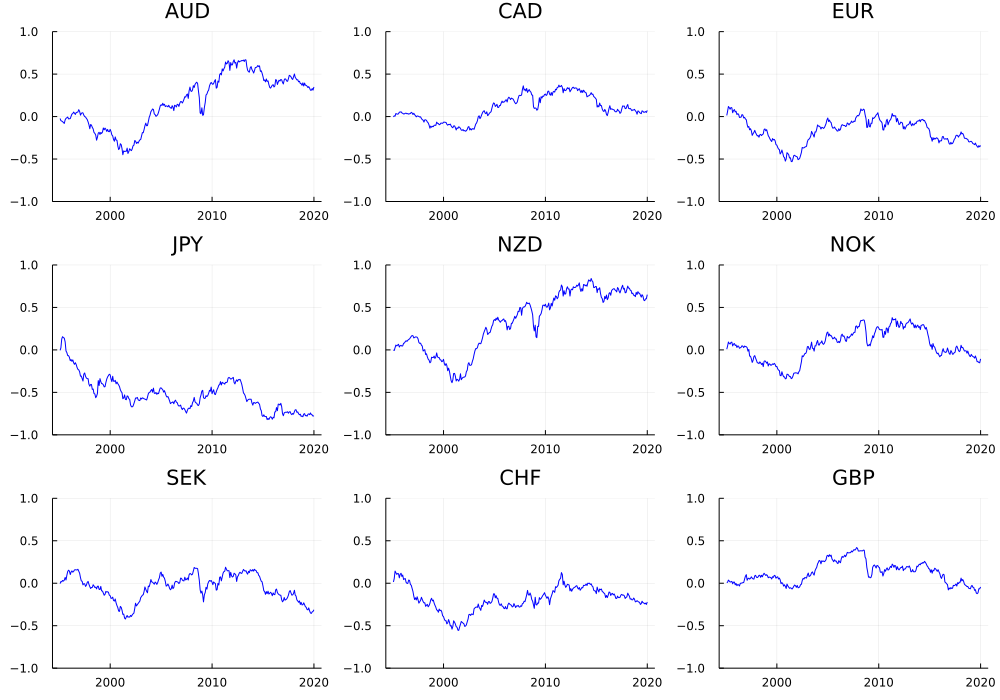

In [8]:
#step 4: Plot the data
dN = x[:,1]                                                      #define values for x-axis
tick_years = Date.([2000, 2010, 2020])                           #define tick marks for x-axis
DateTick = Dates.format.(tick_years, "yyyy")                     #define tick marks for x-axis
x_vals = dN                                                      #data: dates
y_vals = cumsum_returns                                          #data: cumsum of log returns for each currency
titles = ["AUD" "CAD" "EUR" "JPY" "NZD" "NOK" "SEK" "CHF" "GBP"] #define chart titles

p2 = plot(x_vals, y_vals,
          layout = (3,3),
          linecolor = :blue,
          xticks = (tick_years, DateTick),
          ylims = (-1,1),
          title = titles,
          legend = false)

display(p2)

# Carry Trade Strategy

A currency carry trade is a strategy that involves borrowing from a low interest rate currency and to fund purchasing a currency that provides a rate. A trader using this strategy attempts to capture the difference between the rates, which can be substantial depending on the amount of leverage used.

The carry trade strategy is implemented as follows:
1. Find the 4 currencies with the highest forward premia (interest rate differential) in $t-1$ and give each a portfolio weight `w[t,i]=1/4`. These are the investment currencies.

2. Find the 4 currencies with the lowest forward premia in $t-1$ and give each a portfolio weight `w[t,i]=-1/4`. These are the funding currencies.

3. The portfolio return in t is `w[t,:]'*R[t,:]`. For all periods that lacks data, set the portfolio return to 0.

4. The performance is then compared to an equally weighted portfolio (1/9 in each currency).

In [9]:
#Carry Trade Strategy (CT)
(T, n) = size(fp)                 #get number of rows and columns
w_ct = fill(NaN,T,n)              #initialize weigth vecotr
w_ct[1,:] = zeros(n)              #set the weights equal 0 for the first period
Rp_ct = fill(NaN,T)               #initialize portfolio return vector
Rp_ct[1] = 0                      #set portfolio return vector in period 1 to zero
m = 4                             #number of long/short positions

for t = 2:T                       #loop over all periods, starting at period 2
    s = sortperm(fp[t-1,:])       #sort forward premium vector
    w_ct[t,:] = zeros(n)          #initialize weight vector with zeros
    w_ct[t,s[1:m]] .= -1/m        #assign short positions to weight vector
    w_ct[t,s[end-m+1:end]].= 1/m  #same for long positions
    Rp_ct[t] = w_ct[t,:]'R[t,:]   #compute portfolio return in period t
end

#Compute cumsum of log returns (CT)
log_rp_ct = cumsum(log_return.(Rp_ct), dims=1)

300-element Vector{Float64}:
  0.0
 -0.03745779001584232
 -0.1134366496501759
 -0.09074679734355094
 -0.08453356451303813
 -0.09333372256860477
 -0.06057821485049948
 -0.016651764144829904
 -0.010679881385988596
  0.005758637756062885
  0.015716716103971497
  0.015258811281558524
  0.046083414001296466
  ⋮
  0.7837584088846349
  0.7840658866085143
  0.7833822780013853
  0.7883453664771329
  0.7681680670000969
  0.774260470563025
  0.7780750607539543
  0.7532044348201477
  0.7645263246561231
  0.7629431721312311
  0.764354975068301
  0.786774958411522

In [10]:
#Equal Weight Strategy (EW)
w_ew = fill((1/9), 9)           #create equal weights for each currency
Rp_ew = fill(NaN, T)            #initialize portfolio return vector

for t in 1:T
    Rp_ew[t] = w_ew'*R[t,:]     #compute portfolio return in period t
end

#Compute cumsum of log returns (EW)
log_rp_ew = cumsum(log_return.(Rp_ew), dims=1)

300-element Vector{Float64}:
  0.0009763454418564364
  0.01881171215184013
  0.05823117692023195
  0.06310810977151732
  0.05114930973823567
  0.05735518009531105
  0.06288116147509344
  0.02891236615929888
  0.047358256510536816
  0.05420063837739732
  0.03766114526314588
  0.039795687727810176
  0.017241146721428423
  ⋮
  0.008893658139801586
 -0.004017241096483659
 -0.01192636928864163
 -0.024415242738540316
 -0.032485307178815065
 -0.012116816048635848
 -0.03460243334575777
 -0.050691052782143226
 -0.05502456221879501
 -0.040533905198766235
 -0.04853705625978552
 -0.020852004076963998

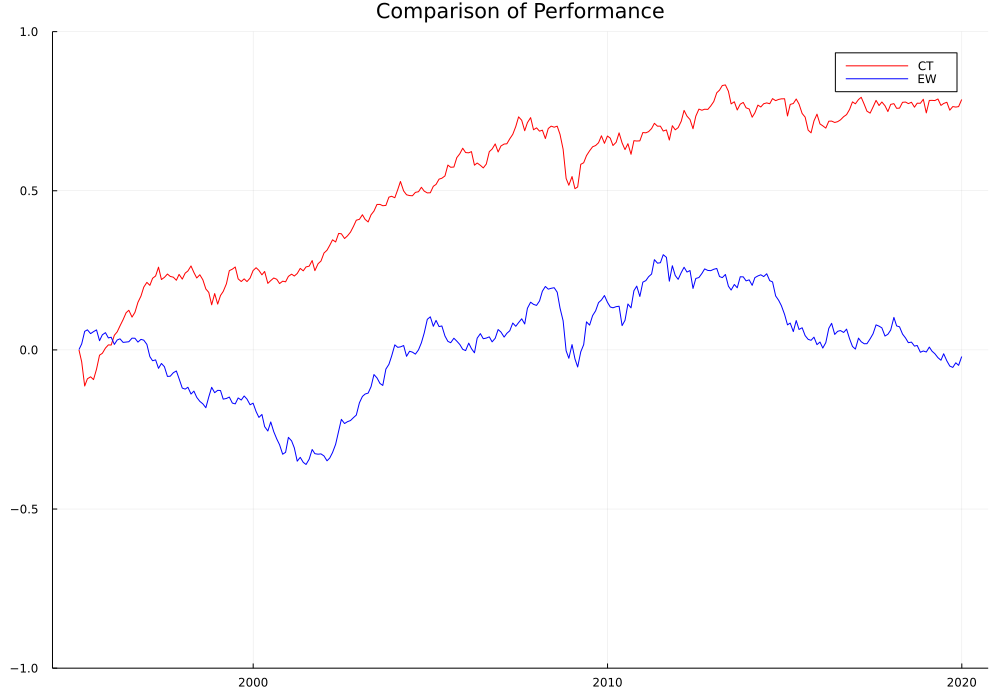

In [11]:
dN = x[:,1]                                    # define values for x-axis
tick_years = Date.([2000, 2010, 2020])         # define tick marks for x-axis
DateTick = Dates.format.(tick_years, "yyyy")   # define tick marks for x-axis
y_vals = [dN dN]                               # define data: dates
x_vals = [log_rp_ct log_rp_ew]                 # define data: cumsum of log returns

p3 = plot(y_vals, x_vals,
          linecolor = [:red :blue],
          xticks = (tick_years, DateTick),
          ylims = (-1,1),
          label = ["CT" "EW"],
          title = "Comparison of Performance",
          legend = true)

display(p3)

# Return statistics

1. For each of the two portfolio returns, the average returns, standard deviation and their ratio (the "Sharpe ratio") are computed.

2. For each currency, the frequency of periods that the currency is in the "high" carry trade portfolio are reported.

In [12]:
#Return statistics 1.0: Annualized return stats with log returns
Rp = [log_return.(Rp_ct) log_return.(Rp_ew)]

μ = mean(Rp, dims=1)*12
σ = std(Rp, dims=1)*sqrt(12)
SR = μ./σ

printmat("Annualized return statistics with log returns:")
printmat([μ;σ;SR],colNames=["CT","EW"],rowNames=["avg return","std","SR"])

Annualized return statistics with log returns:



                  CT        EW
avg return     0.031    -0.001
std            0.071     0.078
SR             0.444    -0.011



In [13]:
#Return statistics 2.0: Annualized return statistics with regular returns
Rp = [Rp_ct Rp_ew]

μ = mean(Rp, dims=1)*12
σ = std(Rp, dims=1)*sqrt(12)
SR = μ./σ

printmat("Annualized return statistics with regular returns:")
printmat([μ;σ;SR],colNames=["CT","EW"],rowNames=["avg return","std","SR"])

Annualized return statistics with regular returns:

                  CT        EW
avg return     3.401     0.221
std            7.061     7.813
SR             0.482     0.028



In [14]:
#Report absolute and relative frequency that the currency is in the high carry trade portfolio
absolute_freq = sum(w->(w==0.25),w_ct,dims=1)
relative_freq = absolute_freq ./ (T - 1)

printmat([absolute_freq; relative_freq], rowNames=["Absolute", "Relative"], colNames=["AUD","CAD","EUR","JPY","NZD","NOK","SEK","CHF","GBP"])

               AUD       CAD       EUR       JPY       NZD       NOK       SEK       CHF       GBP
Absolute   295.000   140.000     7.000     0.000   287.000   213.000    95.000     0.000   159.000
Relative     0.987     0.468     0.023     0.000     0.960     0.712     0.318     0.000     0.532

